In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import requests
from sklearn.linear_model import LinearRegression

#### Import Files

In [2]:
mort_data = r'C:/Users/obrienjo/Desktop/Github/UCD-project/Mortality_data.csv'
ireland_pop = r'C:/Users/obrienjo/Desktop/Github/UCD-project/Ireland Population.csv'

In [3]:
mort_df = pd.read_csv(mort_data)
irl_pop = pd.read_csv(ireland_pop)


In [4]:
mort_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342228 entries, 0 to 342227
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Statistic       342228 non-null  object
 1   Year            342228 non-null  int64 
 2   Age Group       342228 non-null  object
 3   Sex             342228 non-null  object
 4   Cause of Death  342228 non-null  object
 5   UNIT            342228 non-null  object
 6   VALUE           342227 non-null  object
dtypes: int64(1), object(6)
memory usage: 18.3+ MB


In [5]:
mort_df.head(10)
mort_df['Year'].max()

2017

In [6]:
mort_df.isna().sum()

Statistic         0
Year              0
Age Group         0
Sex               0
Cause of Death    0
UNIT              0
VALUE             1
dtype: int64

In [7]:
mort_df.fillna('check', inplace = True)
mort_df.columns

Index(['Statistic', 'Year', 'Age Group', 'Sex', 'Cause of Death', 'UNIT',
       'VALUE'],
      dtype='object')

In [8]:
mort_df.query('VALUE == "check"')

,Statistic,Year,Age Group,Sex,Cause of Death,UNIT,VALUE
313812,"Death Rate per 100,000 Population",2013,65 - 69 years,Both sexes,"Malignant neoplasm of bladderb,Rate""",5.79,check


In [9]:
mort_df_malignant_check = pd.DataFrame(mort_df[(mort_df['Year'] == 2013) & (mort_df['Age Group'] == '65 - 69 years') & (mort_df['Cause of Death'] == 'Malignant neoplasm of bladder') & (mort_df['Statistic'] == 'Death Rate per 100,000 Population')])
mort_df_malignant_check['VALUE'] = mort_df_malignant_check['VALUE'].map(float)

In [10]:
np.mean(mort_df_malignant_check['VALUE'])

5.79

In [11]:
mort_df.at[313812,'Cause of Death']='Malignant neoplasm of bladder'
mort_df.at[313812,'UNIT'] = 'Rate'
mort_df.at[313812,'VALUE'] = 5.79

In [12]:
mort_df.query('VALUE == "check"')

,Statistic,Year,Age Group,Sex,Cause of Death,UNIT,VALUE


In [13]:
mort_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342228 entries, 0 to 342227
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Statistic       342228 non-null  object
 1   Year            342228 non-null  int64 
 2   Age Group       342228 non-null  object
 3   Sex             342228 non-null  object
 4   Cause of Death  342228 non-null  object
 5   UNIT            342228 non-null  object
 6   VALUE           342228 non-null  object
dtypes: int64(1), object(6)
memory usage: 18.3+ MB


In [14]:
mort_df['VALUE'].replace({'-': 0 }, inplace=True)
mort_df['VALUE'] = mort_df['VALUE'].map(float)

In [15]:
mort_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342228 entries, 0 to 342227
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Statistic       342228 non-null  object 
 1   Year            342228 non-null  int64  
 2   Age Group       342228 non-null  object 
 3   Sex             342228 non-null  object 
 4   Cause of Death  342228 non-null  object 
 5   UNIT            342228 non-null  object 
 6   VALUE           342228 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 18.3+ MB


In [16]:
mort_df['UNIT'].unique()

array(['Number', 'Rate'], dtype=object)

In [17]:
mort_df_r = mort_df[mort_df['UNIT']== 'Number']

### Clean Population Data for the same time frame as mortality rates - 1980 to 2017

In [18]:
irl_pop.head(10)


,Statistic,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61.1
1,Population Estimates (Persons in April),1950,Under 1 year,Male,Thousand,31.4
2,Population Estimates (Persons in April),1950,Under 1 year,Female,Thousand,29.7
3,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,NaN
4,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,NaN
5,Population Estimates (Persons in April),1950,0 - 4 years,Female,Thousand,NaN
6,Population Estimates (Persons in April),1950,0 - 14 years,Both sexes,Thousand,851.2
7,Population Estimates (Persons in April),1950,0 - 14 years,Male,Thousand,434.6
8,Population Estimates (Persons in April),1950,0 - 14 years,Female,Thousand,416.6
9,Population Estimates (Persons in April),1950,1 - 4 years,Both sexes,Thousand,249.1


In [19]:
irl_pop_NA = irl_pop[irl_pop['VALUE'].isna()]
irl_pop_NA['Age Group'].unique()



array(['0 - 4 years'], dtype=object)

In [20]:
irl_pop_80_17 = irl_pop[(irl_pop['Year'] >= 1980) & (irl_pop['Year'] <=2017)]
irl_pop_80_17.isna().sum()
irl_pop_80_17_na = irl_pop_80_17[irl_pop_80_17['VALUE'].isna()]
irl_pop_80_17_yearsna = irl_pop_80_17['Year'][irl_pop_80_17['VALUE'].isna()]
year_list_missing_data = list(irl_pop_80_17_yearsna.unique())
print(year_list_missing_data)
    

[1980, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1992, 1993, 1994, 1995]


In [21]:
irl_pop_80_17_na['Age Group'].unique()


array(['0 - 4 years'], dtype=object)

### can we use future populatin relationship of 0 - 4 age group and 5 - 9 age group to determine missing data in 0 - 4 age group

Age Group    0
Statistic    0
Year         0
Sex          0
UNIT         0
VALUE        0
dtype: int64
0.8136002776506115


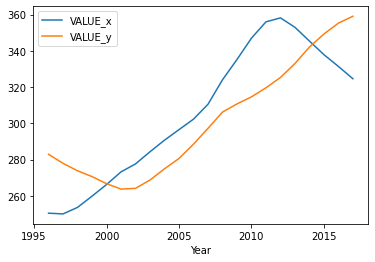

In [22]:
irl_pop_95_17 = irl_pop_80_17[(irl_pop_80_17['Year'] > 1995) &(irl_pop_80_17['Year'] <=2017) & (irl_pop_80_17['Sex'] == 'Both sexes') ]

indexset = irl_pop_95_17.reset_index(drop = True).set_index('Age Group')

irl_pop_95_17_0to4 = indexset.loc['0 - 4 years'].reset_index(drop = False)
irl_pop_95_17_5to9 = indexset.loc['5 - 9 years'].reset_index(drop = False)


print(irl_pop_95_17_0to4.isna().sum())

irl_pop_95_17_0to4['VALUE'] = irl_pop_95_17_0to4['VALUE'].map(float)
irl_pop_95_17_5to9['VALUE'] = irl_pop_95_17_5to9['VALUE'].map(float)
df_0to4 = pd.DataFrame(irl_pop_95_17_0to4)
df_5to9 = pd.DataFrame(irl_pop_95_17_5to9)


df3 = df_0to4.merge(df_5to9, on = 'Year')
df3.columns
correlation = df3['VALUE_x'].corr(df3['VALUE_y'])
print(correlation)

df3.plot(x ='Year', y=['VALUE_x','VALUE_y'], kind = 'line')
plt.show()


In [23]:
model = LinearRegression()
x = np.array(df3['VALUE_x']).reshape((-1, 1))
y = np.array(df3['VALUE_y'])
model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print(model.intercept_ + model.coef_ * 250)


coefficient of determination: 0.6619454117931518
intercept: 88.43637012082363
slope: [0.69550222]
[262.31192592]


In [24]:
#irl_pop_80_17_both_sex = irl_pop_80_17[(irl_pop_80_17['Year'] >= 1980) &(irl_pop_80_17['Year'] <=) & (irl_pop_80_17['Sex'] == 'Both sexes') ]

irl_pop_80_17 = pd.DataFrame(irl_pop_80_17)
#irl_pop_80_17.reset_index(level=None, drop=False)
print(irl_pop_80_17)
irl_pop_80_17.iloc[3,5]

                                    Statistic  Year          Age Group  \
2430  Population Estimates (Persons in April)  1980       Under 1 year   
2431  Population Estimates (Persons in April)  1980       Under 1 year   
2432  Population Estimates (Persons in April)  1980       Under 1 year   
2433  Population Estimates (Persons in April)  1980        0 - 4 years   
2434  Population Estimates (Persons in April)  1980        0 - 4 years   
...                                       ...   ...                ...   
5503  Population Estimates (Persons in April)  2017  85 years and over   
5504  Population Estimates (Persons in April)  2017  85 years and over   
5505  Population Estimates (Persons in April)  2017           All ages   
5506  Population Estimates (Persons in April)  2017           All ages   
5507  Population Estimates (Persons in April)  2017           All ages   

             Sex      UNIT   VALUE  
2430  Both sexes  Thousand    72.5  
2431        Male  Thousand    37.4  


nan

In [25]:

irl_pop_80_17.fillna('check', inplace = True)
new_age_list = []
index_list = []
for l, row in irl_pop_80_17.iterrows():    
    if row['VALUE'] == 'check':
        index = irl_pop_80_17.index.get_loc(l)
        index = int(index)
        index_list.append(index)
        
        #index=irl_pop_80_17.index
        #ref_index = index[row['VALUE']=='check']
        
        year = row['Year']
        sex = row['Sex']
        age = '5 - 9 years'
        indexset = irl_pop_80_17.reset_index(drop = True).set_index(['Year', 'Sex', 'Age Group'])
        regressionx = indexset['VALUE'].loc[(year, sex, age)]
        new_age = (model.intercept_ + model.coef_ * regressionx)
        new_age = int(new_age)      
        new_age_list.append(new_age)
        
        irl_pop_80_17.iloc[index,5] == new_age
        #row['VALUE'].replace({'check': new_age }, inplace=True)
new_age_list = np.array(new_age_list).flatten()
print(new_age_list)
print(index_list)        

irl_pop_80_17.head(10)

index_list_range = list(range(len(index_list)))
for i in index_list_range:
     irl_pop_80_17.iloc[index_list[i],5] = new_age_list[i]
irl_pop_80_17.head(10)        

[331 212 207 332 213 207 333 214 207 333 214 208 333 214 207 333 213 207
 331 212 206 326 210 203 317 205 199 304 199 193 298 196 190 292 193 187
 288 190 185]
[3, 4, 5, 165, 166, 167, 246, 247, 248, 327, 328, 329, 408, 409, 410, 570, 571, 572, 651, 652, 653, 732, 733, 734, 813, 814, 815, 975, 976, 977, 1056, 1057, 1058, 1137, 1138, 1139, 1218, 1219, 1220]


,Statistic,Year,Age Group,Sex,UNIT,VALUE
2430,Population Estimates (Persons in April),1980,Under 1 year,Both sexes,Thousand,72.5
2431,Population Estimates (Persons in April),1980,Under 1 year,Male,Thousand,37.4
2432,Population Estimates (Persons in April),1980,Under 1 year,Female,Thousand,35.1
2433,Population Estimates (Persons in April),1980,0 - 4 years,Both sexes,Thousand,331
2434,Population Estimates (Persons in April),1980,0 - 4 years,Male,Thousand,212
2435,Population Estimates (Persons in April),1980,0 - 4 years,Female,Thousand,207
2436,Population Estimates (Persons in April),1980,0 - 14 years,Both sexes,Thousand,1035.4
2437,Population Estimates (Persons in April),1980,0 - 14 years,Male,Thousand,530.6
2438,Population Estimates (Persons in April),1980,0 - 14 years,Female,Thousand,504.9
2439,Population Estimates (Persons in April),1980,1 - 4 years,Both sexes,Thousand,275.2


In [26]:
irl_pop_80_17.info()
irl_pop_80_17['UNIT'].unique()
irl_pop_80_17['Population'] = irl_pop_80_17['VALUE'] * 1000

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3078 entries, 2430 to 5507
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statistic  3078 non-null   object
 1   Year       3078 non-null   int64 
 2   Age Group  3078 non-null   object
 3   Sex        3078 non-null   object
 4   UNIT       3078 non-null   object
 5   VALUE      3078 non-null   object
dtypes: int64(1), object(5)
memory usage: 232.9+ KB


In [27]:
irl_pop_80_17_m = irl_pop_80_17[['Year', 'Age Group', 'Sex', 'Population']]

In [28]:
mort_df_r.columns
mort_df_r.shape



(171114, 7)

### Join population and mortality df

In [29]:
new_mort_df = pd.merge(mort_df_r,irl_pop_80_17_m, how = 'left', left_on =['Year', 'Age Group', 'Sex'], right_on = ['Year', 'Age Group', 'Sex'], suffixes = ('_mort', '_pop'))

In [30]:
new_mort_df.shape



(171114, 8)

In [31]:
new_mort_df.head(10)


,Statistic,Year,Age Group,Sex,Cause of Death,UNIT,VALUE,Population
0,Deaths,1980,0 - 4 years,Both sexes,All causes of death,Number,1006.0,331000
1,Deaths,1980,0 - 4 years,Both sexes,Infectious and parasitic diseases,Number,38.0,331000
2,Deaths,1980,0 - 4 years,Both sexes,Tuberculosis,Number,0.0,331000
3,Deaths,1980,0 - 4 years,Both sexes,Meningococcal infection,Number,14.0,331000
4,Deaths,1980,0 - 4 years,Both sexes,Aids (HIV disease),Number,0.0,331000
5,Deaths,1980,0 - 4 years,Both sexes,Viral hepatitis,Number,0.0,331000
6,Deaths,1980,0 - 4 years,Both sexes,All other infectious and parasitic diseases,Number,24.0,331000
7,Deaths,1980,0 - 4 years,Both sexes,Neoplasms,Number,16.0,331000
8,Deaths,1980,0 - 4 years,Both sexes,Malignant neoplasms,Number,16.0,331000
9,Deaths,1980,0 - 4 years,Both sexes,"Malignant neoplasm of lip, oral cavity, pharynx",Number,0.0,331000


In [32]:
new_mort_df['Death_Percent'] = (new_mort_df['VALUE']/new_mort_df['Population']) * 100
new_mort_df_Summary = new_mort_df[(new_mort_df['Age Group'] == 'All ages') & (new_mort_df['Sex'] == 'Both sexes') & (new_mort_df['Cause of Death'] == 'All causes of death')]


<AxesSubplot:title={'center':'Total Deaths Per Annum'}, xlabel=' Year', ylabel='Total Deaths'>

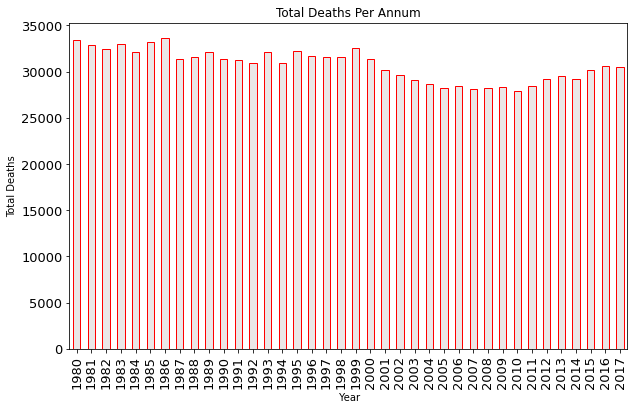

In [33]:
new_mort_df_Summary_group = new_mort_df_Summary.groupby('Year')['VALUE'].sum()
new_mort_df_Summary_group.plot(kind = 'bar', title = 'Total Deaths Per Annum', ylabel = 'Total Deaths', xlabel = ' Year', figsize = (10,6), color =(0.2, 0.1, 0.1, 0.1),  edgecolor='red', fontsize = 13)
                       


<AxesSubplot:title={'center':'Population by Year'}, xlabel=' Year', ylabel='Population'>

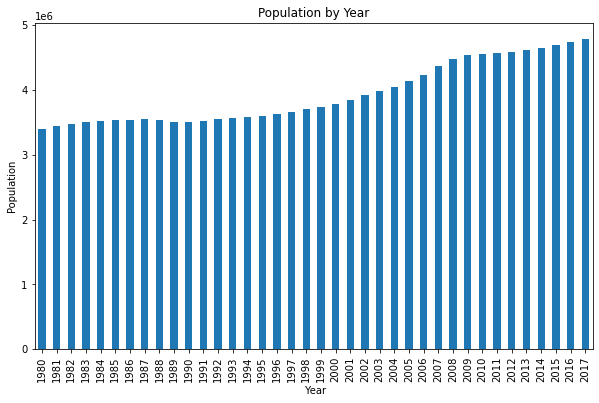

In [34]:
new_mort_df_Summary_group = new_mort_df_Summary.groupby('Year')['Population'].sum()
new_mort_df_Summary_group.plot(kind = 'bar', title = 'Population by Year', ylabel = 'Population', xlabel = ' Year', figsize = (10,6))


In [35]:

def keyword_search (search_word):
    list_of_key = []   
    search = search_word
    d = '(?!$)' + search + '(?!$)'
    key = new_mort_df['Cause of Death'].str.lower()[new_mort_df['Cause of Death'].str.lower().str.contains(d)].unique()
    list_of_key.append(key)
    list_of_key = np.array(list_of_key).flatten()
    print (list_of_key)
    #print(list(new_mort_df['Age Group'].unique()))
    return (list_of_key)

In [40]:
list_of_key = keyword_search('meni')
#keyword_search('car')
#print(list_of_key)


['meningococcal infection' 'mental and behavioural disorders' 'meningitis']


### meningitis related deaths
add sort to list


In [41]:
def categorised_data (query, age_group):
    indexset = new_mort_df.reset_index(drop = False).set_index('Age Group')
    sorted_mort_df = indexset.loc[age_group].reset_index(drop = False)
    sorted_mort_df['Cause of Death'] = sorted_mort_df['Cause of Death'].str.lower()    
    sorted_mort_df = sorted_mort_df.reset_index(drop = False).set_index('Cause of Death')
    new_sorted_mort_df = sorted_mort_df.loc[query].reset_index(drop = False)
    return new_sorted_mort_df

In [42]:
categorised_data(list_of_key,'All ages')

,Cause of Death,level_0,Age Group,index,Statistic,Year,Sex,UNIT,VALUE,Population,Death_Percent
0,meningococcal infection,3,All ages,4269,Deaths,1980,Both sexes,Number,18.0,3401000.0,0.000529
1,meningococcal infection,82,All ages,4348,Deaths,1980,Male,Number,11.0,1709000.0,0.000644
2,meningococcal infection,161,All ages,4427,Deaths,1980,Female,Number,7.0,1692000.0,0.000414
3,meningococcal infection,240,All ages,8772,Deaths,1982,Both sexes,Number,22.0,3480000.0,0.000632
4,meningococcal infection,319,All ages,8851,Deaths,1982,Male,Number,12.0,1746000.0,0.000687
...,...,...,...,...,...,...,...,...,...,...,...
337,meningitis,8645,All ages,166487,Deaths,1981,Male,Number,12.0,1729400.0,0.000694
338,meningitis,8724,All ages,166566,Deaths,1981,Female,Number,6.0,1714100.0,0.00035
339,meningitis,8803,All ages,170911,Deaths,2000,Both sexes,Number,5.0,3789500.0,0.000132
340,meningitis,8882,All ages,170990,Deaths,2000,Male,Number,1.0,1882900.0,0.000053


In [44]:
new_sorted_mort_df = categorised_data(list_of_key,'All ages')
print(new_sorted_mort_df.head())

            Cause of Death  level_0 Age Group  index Statistic  Year  \
0  meningococcal infection        3  All ages   4269    Deaths  1980   
1  meningococcal infection       82  All ages   4348    Deaths  1980   
2  meningococcal infection      161  All ages   4427    Deaths  1980   
3  meningococcal infection      240  All ages   8772    Deaths  1982   
4  meningococcal infection      319  All ages   8851    Deaths  1982   

          Sex    UNIT  VALUE Population Death_Percent  
0  Both sexes  Number   18.0  3401000.0      0.000529  
1        Male  Number   11.0  1709000.0      0.000644  
2      Female  Number    7.0  1692000.0      0.000414  
3  Both sexes  Number   22.0  3480000.0      0.000632  
4        Male  Number   12.0  1746000.0      0.000687  


In [ ]:
#list_of_keywords = np.array(list_of_keywords).flatten()